## Singular value decomposition and its applications

A singular decomposition (SVD, Singular value decomposition) of a matrix $A$ of size $m\times n$ is called a representation

$$A = U\Sigma V^T,$$

where $U$ is an orthogonal matrix of size $m\times m$, $V$ is an orthogonal matrix of size $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ is a diagonal matrix of size $m\times n$ in which $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

In fact, the requirement that the matrices $U$ and $V$ be square is redundant. **The truncated singular value decomposition* we will call the decomposition

$$A = U\Sigma V^T,$$

where $U$ is an orthogonal matrix of size $m\times k$, $V^T$ is an orthogonal matrix of size  $k\times n$, $\Sigma$ is a diagonal matrix of size $k\times k$, and $k = \min(m,n)$. Next, we will work exclusively with the truncated decomposition.

### Data compression using SVD = building a low-rank approximation

We introduce the *Frobenius norm* of the matrix as

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

In other words, this is the usual Euclidean distance in space, which is obtained if all the matrices are drawn into long vectors.

Let's ask ourselves a question: how to find a matrix $A_{r}$ of rank $r$ that is least different from $A$ by the Frobenius norm (that is, for which the difference norm $||A - A_{r}||_{frob}$ is minimal). It turns out that this can be done using singular value decomposition:

**The theorem.** Let $\Sigma_{r}$ be a matrix obtained from $\Sigma$ by replacing diagonal elements $\sigma_{i}$ ($i>r$) with zeros, then $A_{r} = U\Sigma_{r}V^T$.

This can be rewritten in a more economical way. If

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

then

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

At the same time

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

If the singular values of the matrix fall fast enough (and this is often the case in real problems), then the difference norm will be small with a relatively small value of $r$.

We needed $m\times n$ of memory to store the original matrix. Now, if we store separately $U_r$, $V_r$ and diagonal elements $\Sigma_r$, the memory costs will be $mr + nr + r = r(m+n +1)$.

**Decomposition into rank 1 components**

Denote by $u_1,\ldots, u_k$ the columns of the matrix $U$, and by $v_1, \ldots, v_k$ the columns of the matrix $V$. Then there is equality

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

The matrix $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ we will call the $k$ - th component of rank 1 of the matrix $A$. Note that the terms in this sum are orthogonal with respect to the scalar product $(X, Y) =\mathrm{tr}(X^TY)$ (generating the Frobenius norm).

As it is easy to notice,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

### 1. Data compression using SVD

Upload a photo.

In [2]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2)

Draw a picture:

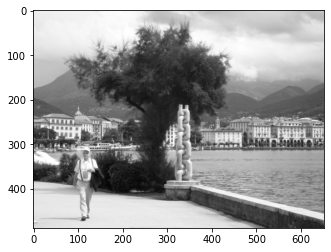

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Construct a singular value decomposition of this matrix.

In [4]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1.** Draw a plot of the diagonal elements of the matrix $\Sigma$:

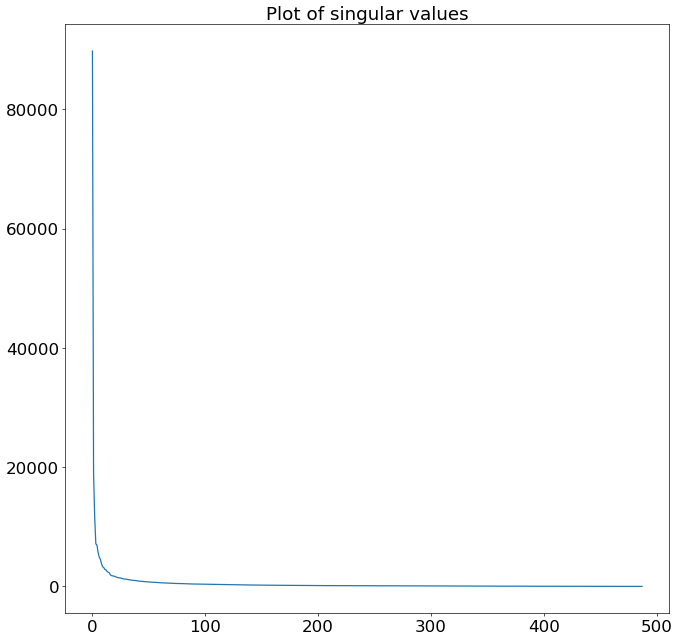

In [5]:
plt.figure(figsize = (13,13),dpi = 60)
plt.rcParams['font.size'] = '20'
plt.title('Plot of singular values',fontsize = 22)
plt.plot(S)
plt.show()

It seems that they decrease quite quickly and there is hope that the first few components will give a picture close to the original one.

**2.** Visualize the first component of rank 1.

Let's look at the first 10 singular values

In [6]:
print(S[0:10])

[89797.94175793 18956.29662388 11665.85353618  7138.21575989
  6956.2788261   5683.95761646  4937.02475038  4557.92905786
  3851.08445723  3305.53063399]


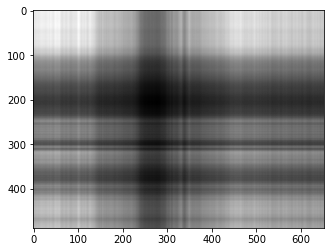

In [7]:
img_first_component = (S[0] * U[:,0:1]) @ VT[0:1,:]
plt.rcParams['font.size'] = '10'
imgplot = plt.imshow(img_first_component, cmap='gray')


Yes, the first singular value is strongly knocked out, but this does not mean that the first component of rank 1 will be close enough to the original picture, as one might expect, since the distribution of singular values has a long tail and although the values themselves become much smaller than the first, there are many of them and therefore they make a big contribution to quality.

**3.** Visualize the sums of the components of rank 1 from the first to the twentieth, from the first to the fiftieth, from the twentieth to the hundredth, from the twentieth to the last.

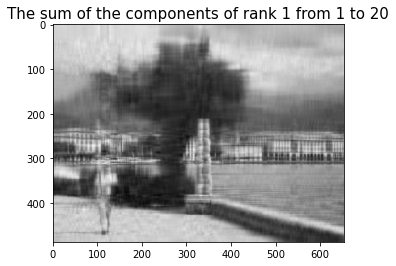

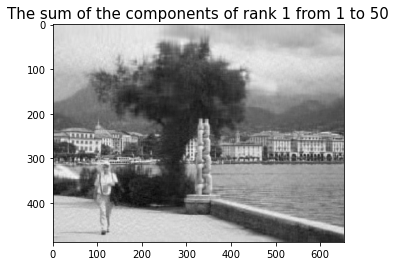

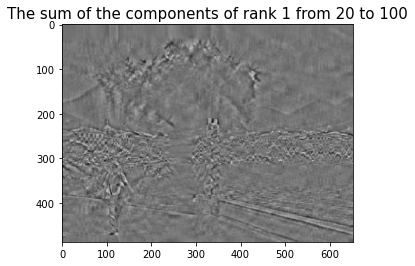

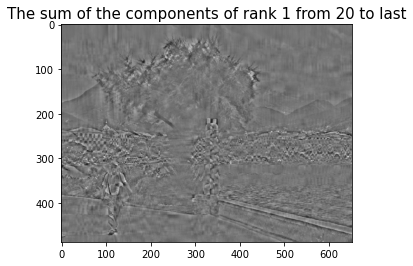

In [8]:
img_1_20_component = U[:,0:20] @ np.diag(S[0:20]) @ VT[0:20,:]
img_1_50_component = U[:,0:50] @ np.diag(S[0:50]) @ VT[0:50,:]
img_20_100_component = U[:,19:100] @ np.diag(S[19:100]) @ VT[19:100,:]
img_20_last_component = U[:,19:] @ np.diag(S[19:]) @ VT[19:,:]
plt.rcParams['font.size'] = '10'
plt.figure(1)
plt.title('The sum of the components of rank 1 from 1 to 20',fontsize = 15)
imgplot = plt.imshow(img_1_20_component, cmap='gray')
plt.figure(2)
plt.title('The sum of the components of rank 1 from 1 to 50',fontsize = 15)
imgplot = plt.imshow(img_1_50_component, cmap='gray')
plt.figure(3)
plt.title('The sum of the components of rank 1 from 20 to 100',fontsize = 15)
imgplot = plt.imshow(img_20_100_component, cmap='gray')
plt.figure(4)
plt.title('The sum of the components of rank 1 from 20 to last',fontsize = 15)
imgplot = plt.imshow(img_20_last_component, cmap='gray')

The most significant singular values are approximately the first 100 (we can see this on the plot), so it is not surprising that the sum of the components of rank 1 from 1 to 50 gave a picture very similar to the original one, the difference between them is only in color transitions, they became smoother, because due to the fact that we cut off a lot of small singular values, which just make small adjustments to the image, as well as clarity, outlines, for example, draw silhouettes more clearly, leaving large values, we remove this adjustment and see only the main figures, the fewer large values we take, the more we will see just blurred color spots, this is like the basis of the picture that only large values can set due to its module and the greater possible spread of values. If we look at the sum of the components of rank 2 from 20 to 100 and the last one, then we will see exactly the same adjustments that are added to the first picture, for example, we can consider some boundaries of mountains, trees, people, and of course, the more values we take, the more the adjustments will be clearer.

**4.** What components do you think you need to take to restore the original image well enough?

In order to estimate how many components you need to take so that the image is close to the original one, but at the same time so that the number of components is smaller, we will plot the root-mean-square error in the difference between the resulting image and the original one and analyze it. (Since the singular values are arranged in non-increasing order and, accordingly, the smaller the index of the value, the greater its value and the more significant it is for the picture, we will consider sequential components from 1 to i)

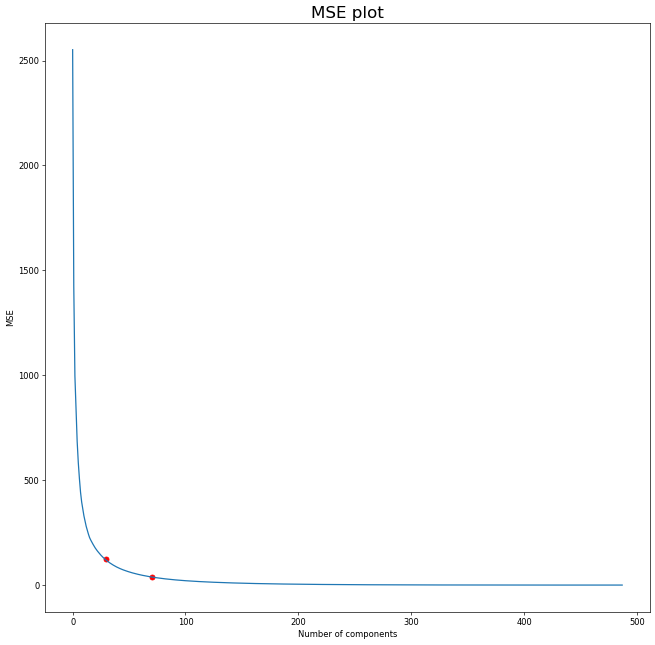

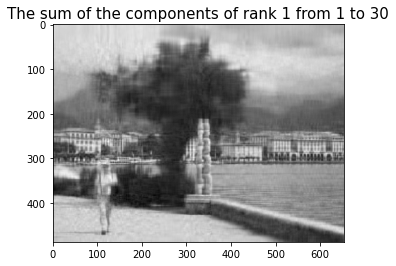

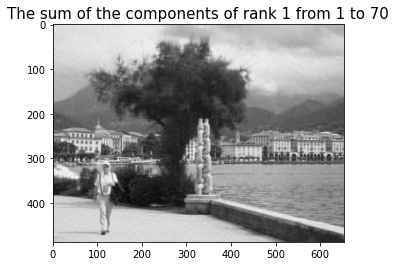

In [9]:
MSE = list()
for i in range(1,len(S) + 1):
    img_test = U[:,0:i] @ np.diag(S[0:i]) @ VT[0:i,:]
    MSE.append(np.sum((img_test - img) * (img_test - img))/(img.shape[0]*img.shape[1]))
plt.figure(figsize = (13,13),dpi = 60)
plt.figure(1)
plt.title('MSE plot',fontsize = 20)
plt.rcParams['font.size'] = '15'
plt.xlabel('Number of components')
plt.ylabel('MSE')
plt.plot(MSE)   
plt.scatter(30,MSE[29],color = 'red') 
plt.scatter(70,MSE[69],color = 'red')
img_1_30_component = U[:,0:30] @ np.diag(S[0:30]) @ VT[0:30,:]
img_1_70_component = U[:,0:70] @ np.diag(S[0:70]) @ VT[0:70,:]
plt.figure(2)
plt.rcParams['font.size'] = '10'
plt.title('The sum of the components of rank 1 from 1 to 30',fontsize = 15)
imgplot = plt.imshow(img_1_30_component, cmap='gray')
plt.figure(3)
plt.rcParams['font.size'] = '10'
plt.title('The sum of the components of rank 1 from 1 to 70',fontsize = 15)
imgplot = plt.imshow(img_1_70_component, cmap='gray')

According to the plot, we see that after the number = 30, the error is quite small and decreases slowly, looking at the picture we can conclude that the picture is really very similar to the original one, with a lot of memory savings. If this quality is not good enough for you, then you can take the number of components up to 70, with the number = 70, it is already difficult to distinguish the picture from the original one, this can also be seen from the plot, which has practically degenerated into a plateau, taking an amount greater than 70 does not really make sense, since the error practically does not change, and the amount of memory consumed growing

### 2. SVD geometry. Data visualization using SVD

**Geometric meaning of SVD**

Let's say we have a sample of $x_1,\ldots,x_m\in\mathbb{R}^n$. Let's write it in the matrix objects-features

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(rows are objects, columns are features) and we will do the SVD decomposition: $X = U\Sigma V^T$. It can be interpreted as follows:

$$X = U\Sigma\cdot V^T,$$

where $U\Sigma$ is a matrix of feature objects for the same objects, but in new features obtained from the original ones using the linear transformation $V$ (we remind you that multiplication by the matrix on the right corresponds to the transformation of columns). Let's try to understand why these features are remarkable.

Consider the matrix $X^TX = V\Sigma^2V^T$. It is easy to see that this is the Gram matrix of the column system of the matrix $X$; in other words, scalar products of vectors of various features are written in it. From the lectures you know that $\sigma_1^2$, the square of the first singular number, is the largest eigenvalue of the matrix $X^TX$, and $v_1$, the first column of the matrix $V$, is the corresponding eigenvector. It can be shown that

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Let's try to understand the physical meaning of this thing. Recall that the rows of the matrix $X$ are the coordinates of objects $x_1,\ldots,x_m$ in the feature space. The product $Xw$ is a vector of values on the same objects of some new feature, which is a linear combination of the original ones with coefficients $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Accordingly, $|Xw|^2$ is the square of the length of the vector composed of the values of the new feature.

Thus, the first singular value of $\sigma_1$ corresponds to a feature whose sum of squares of values is maximal, that is, a feature that takes, relatively speaking, the largest values.

Summarizing, we can say that the singular value decomposition does the following:
- finds a new feature (new direction) along which the "variance" of $^1$ is maximal;
- in the plane orthogonal to it, it finds a feature along which the "variance" is maximal;
- and so on.

---
$^1$ the real sample variance up to a numerical multiplier would be equal to $|Xw - \overline{Xw}|^2$, where $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ is the average value of the attribute.

**1.** Let $\sigma_1$ be the highest singular number of the matrix $X$ of size $m\times n$. Show that the chain of equalities is true
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

Consider the matrix X as a linear mapping matrix $\phi :\mathbb{R}^n\rightarrow\mathbb{R}^m$, such that $y\rightarrow Xy$
Now consider the linear operator $\phi^{*}\phi$, as it was proved in the lecture, this operator is self-adjoint, respectively, there is an orthonormal basis of eigenvectors for $\phi^{*}\phi$

Let's denote this basis for $e_{1}...e_{n}$ (moreover, we will arrange this basis so that the corresponding eigenvalues are non-increasing).  And the corresponding eigenvalues are $\lambda_{1} ... \lambda_{n}$

$|Xy|$ = $\sqrt{(\phi(y),\phi(y))}$ = $\sqrt{(y,\phi^{*}\phi(y))}$ = $\sqrt{(\alpha_{1}e_{1} + ... + \alpha_{n}e_{n},\alpha_{1}\lambda_{1}e_{1} + ... + \alpha_{n}\lambda_{n}e_{n} )}$ = $\sqrt{\alpha_{1}^{2}\lambda_{1} + ... + \alpha_{n}^{2}\lambda_{n}}$  $\leqslant $ $\sqrt{\lambda_{1}} |y| $

Then we get that $\frac{|Xy|}{|y|} \leqslant \sqrt{\lambda_{1}}$. However, we know that equality is achieved when $y = e_{1}$, and $|e_{1}| =1$, therefore, according to the singular bases theorem, $\sqrt{\lambda_{1}} =\sigma_{1}$, the following equality is true:

$\sigma_{1}$ = $\mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right)$

X = $U\Sigma\ V^{T}$ is the complete singular value decomposition of the matrix X. $\sigma_{1} \geqslant \sigma_{2} \geqslant .... \geqslant \sigma_{r} > 0$ - singular values.

The matrices $U,V^{T}$ are orthogonal. The column vectors of the matrix U are an orthonormal system, the row vectors of the matrix $V^{T}$ are an orthonormal system. 

Then $X = \sigma_{1}u_{1}v_{1}^{T} + \sigma_{2}u_{2}v_{2}^{T} + ... + \sigma_{r}u_{r}v_{r}^{T}$, where r is the rank of the matrix X.

Then if |u| = |v| = 1, then

$|u^{T}Xv|$ = $|\sigma_{1} u^{T} u_{1} v_{1}^{T} v + \sigma_{2} u^{T} u_{2} v_{2}^{T} v + ... + \sigma_{r} u^{T} u_{r} v_{r}^{T} v  |$ $\leqslant$ $\sigma_{1} | u^{T} u_{1} v_{1}^{T} v| + \sigma_{1} | u^{T} u_{2} v_{2}^{T} v| + ... +\sigma_{1} | u^{T} u_{r} v_{r}^{T} v |$

The matrix U is an orthogonal square matrix of size m*m, hence it has full rank, which means that the columns of this matrix are linearly independent, hence the columns of the matrix U are the basis of $\mathbb{R}^m$, which means we can express column u through this basis. Similarly with the matrix $V^{T}$ (its strings are the basis in $\mathbb{R}^n$), which means we can express the string $v^{T}$ through this basis. 

$u^{T} = \alpha_{1}u_{1}^{T} + ... + \alpha_{m}u_{m}^{T} $

$v = \beta_{1}v_{1} + ... + \beta_{n}v_{n}$

Then since $U^{T}U = E$

$u^{T}u_{i}$ = $\alpha_{1}u_{1}^{T}u_{i} + ... + \alpha_{m}u_{m}^{T}u_{i}$ = $\alpha_{i}$

And since $V^{T}V = E$

$v_{i}^{T}v$ = $\beta_{1}v_{i}^{T}v_{1} + ... + \beta_{m}v_{i}^{T}v_{m}$ = $\beta_{i}$

Accordingly, we get 

$|u^{T}Xv|$ = $|\sigma_{1}\alpha_{1}\beta_{1} + ... + \sigma_{r} \alpha_{r} \beta_{r}|$ $\leqslant$ $\sqrt{\sigma_{1}^{2}\alpha_{1}^{2} + ... + \sigma_{r}^{2} \alpha_{r}^{2}}$ $\cdot $ $\sqrt{\beta_{1}^{2} + ... + \beta_{r}^{2}}$

This inequality is true, since we can imagine

$\begin{pmatrix}
\sigma_{1}\alpha_{1}\\
... \\
\sigma_{r}\alpha_{r}
\end{pmatrix}$ and $ \begin{pmatrix}
\beta_{1}\\
... \\
\beta_{r}
\end{pmatrix}$ as vectors from $\mathbb{R}^r$ with a standard scalar product, hence the Cauchy-Bunyakovsky inequality is true. 

$|u^{T}Xv|$ = $|\sigma_{1}\alpha_{1}\beta_{1} + ... + \sigma_{r} \alpha_{r} \beta_{r}|$ $\leqslant$ $\sqrt{\sigma_{1}^{2}\alpha_{1}^{2} + ... + \sigma_{r}^{2} \alpha_{r}^{2}}$ $\cdot $ $\sqrt{\beta_{1}^{2} + ... + \beta_{r}^{2}}$ $\leqslant$ $\sigma_{1} \sqrt{\alpha_{1}^{2} + ... + \alpha_{m}^{2}}$ $\cdot$ $\sqrt{\beta_{1}^{2} + ... + \beta_{n}^{2}}$

$(u,u)$ = $(\alpha_{1}u_{1} + ... + \alpha_{m}u_{m},\alpha_{1}u_{1} + ... + \alpha_{m}u_{m})$ = $\alpha_{1}^{2} + ... + \alpha_{m}^{2}$
$(v,v)$ = $(\beta_{1}v_{1} + ... + \beta_{n}v_{n},\beta_{1}v_{1} + ... + \beta_{n}v_{n})$ = $\beta_{1}^{2} + ... + \beta_{n}^{2}$

Since |u| = |v| = 1
$|u^{T}Xv|$ = $|\sigma_{1}\alpha_{1}\beta_{1} + ... + \sigma_{r} \alpha_{r} \beta_{r}|$ $\leqslant$ $\sqrt{\sigma_{1}^{2}\alpha_{1}^{2} + ... + \sigma_{r}^{2} \alpha_{r}^{2}}$ $\cdot $ $\sqrt{\beta_{1}^{2} + ... + \beta_{r}^{2}}$ $\leqslant$ $\sigma_{1} \sqrt{\alpha_{1}^{2} + ... + \alpha_{m}^{2}}$ $\cdot$ $\sqrt{\beta_{1}^{2} + ... + \beta_{n}^{2}}$ = $\sigma_{1}$

Moreover, equality is achieved when $u = u_{1}$ , $v = v_{1}$
$|u^{T}Xv|$ = $|\sigma_{1}\alpha_{1}\beta_{1} + ... + \sigma_{r} \alpha_{r} \beta_{r}|$ = $|\sigma_{1}|$ = $\sigma_{1}$

Then equality is true:
$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$

**2.** Consider the complete singular value decomposition $A =U\Sigma V^T$ for a matrix of size $m\times n$ such that $\text{rk}A=r$. We also define a linear mapping $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, which acts by multiplying by the matrix $A$. Show that $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

Multiplying by the matrix $A$ is equivalent to multiplying by $U\Sigma V^{T}$, it turns out that $Im A$ = {$U\Sigma V^{T}x ; \forall x \in \mathbb{R}^n$}, then multiplying $U\Sigma V^{T}x$ is the multiplication of the matrix $U$ by the column $\Sigma V^{T}x$, that is, we can interpret it as a linear combination of the columns of the matrix U. The rank of the matrix $\Sigma$ is exactly equal to the number of singular values, since multiplying left and right by an invertible matrix does not change the rank ($U$ and $V^{T}$ are invertible, since they are orthogonal), therefore, the rank of the matrix $A = r$ and coincides with the number of singular values. Then in order to understand with what coefficients we take the columns of the matrix $U$, we must consider the matrix $\Sigma V^{T}x$, the column $V^{T}x$ is multiplied by a diagonal matrix, where the first $r$ values are positive, and the rest are $0$, therefore, we get a column where $0$ will stand from $r+1$ to $n$ coordinate. Hence, $ImA \subseteq <u_{1} ... u_{r}>$

We prove the inverse inclusion, for this we show that any linear combination r of the first columns can be achieved. To do this, solve the equation $\Sigma _{r} V^{T}_{r}x_{r} = c$, where $c$ is the matrix of coefficients we want to get,$\Sigma_{r}$ is a diagonal submatrix of size $r\cdot r$, $V^{T}_{r}$ is a submatrix $V^{T}$ of size $r\cdot n$, $x_{r} \in \mathbb{R}^r$. Since all the rows in the matrix $V^{T}$ were linearly independent, elementary transformations of the rows (using the matrix $\Sigma_{r}$) did not change their linear independence, therefore, the matrix $V^{T}_{r}$ can be reduced by elementary transformations to an improved stepwise where the steps will be $= r$, it follows that the solution of the equation $\Sigma _{r} V^{T}_{r}x_{r} = c$ will always be, it follows that we have proved: $ImA = <u_{1} ... u_{r}>$

Consider $KerA =${$x\in \mathbb{R}^n$ : $U\Sigma V^{T}x= 0$}, since the matrix U is invertible, then multiply left and right by $U^{-1} = U^{T}$, we get, $\Sigma V^{T}x = 0$, the rank of the matrix $\Sigma V^{T} = r$ (since multiplying from the left by the invertible matrix U does not change the rank) (since multiplying from the left by the matrix $\Sigma$ works like multiplying by the corresponding element on diagonally each row of the matrix $V^{T}$, then the last rows from $r+1$ to $n$ will be zero), the dimension of fundamental system of solutions = $n - r$. Then we present $n-r$ linearly independent vectors occupying this matrix, then the fundamental system of solutions will be their linear shell. Consider the vectors $v_{r+1} ... v_{n}$, since the matrix $V$ is the inverse of the matrix $V_{T}$, we get that the multiplication of the vector $v_{r+1}$ (the reasoning is similar for all up to $v_{n}$) by the truncated matrix $V^{T}_{r}$ gives a zero column, and since in the matrix $\Sigma V^{T}$ rows with indexes from $r+1$ to n are zero, it follows that $\Sigma V^{T}v_{r+1} = 0$. And also since the matrix $V$ is invertible, it follows that its columns are linearly independent, then we get that $KerA$ = <$v_{r+1}...v_{n}$>

**3.** Consider a matrix $A$ of size $m\times n$ such that $m\geqslant n$ and columns $A$ are linearly independent. Find the matrix $\Sigma$ from the complete singular value decomposition for the matrix $P = A(A^T A)^{-1} A^T$.

$A = U\Sigma V^{T}$, where $U$ is an orthogonal matrix ($U^{T}= U^{-1}$) of size $m\times m$, $V$ is an orthogonal matrix ($V^{T}= V^{-1}$) of size $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ is a diagonal matrix of size $m\times n$ in which $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$. Then $P = A(A^{T}A)^{-1}A^{T} = U\Sigma V^{T}(V\Sigma^{T}U^{T}U\Sigma V^{T})^{-1}V\Sigma ^{T} U^{T} = U\Sigma V^{T}(V\Sigma ^{T}\Sigma V^{T})^{-1}V\Sigma^{T}U^{T}$

The rank of the matrix $A = n$, since the size of the matrix $m \times n$, $m\geqslant n$ and the columns of the matrix $A$ are linearly independent, then the rank of the matrix $\Sigma$ is $n$. Then the matrix $\Sigma ^{T}\Sigma = M$, where $M$ is a diagonal matrix $n\times n$, which has singular values squared on the diagonal, that is, it has full rank, which means it is invertible. $M^{-1}$ is a diagonal matrix with elements on the diagonal inverse to the squares of singular values. That is, the element $m_{ii} = \frac{1}{(\sigma _{i})^{2}}$

Then $(V\Sigma^{T} \Sigma V^{T})^{-1} =(V^{T})^{-1} M^{-1} V^{-1} = VM^{-1}V^{T}$

$P = U \Sigma V^{T}(V\Sigma^{T}\Sigma V^{T})^{-1}V\Sigma^{T}U^{T}= U\Sigma V^{T}VM^{-1}V^{T}V\Sigma ^{T} U^{T} = U\Sigma M^{-1}\Sigma ^{T}U^{T}= U\Sigma _{2}U^{T}$, where $\Sigma _{2}$ is diagonal matrix $m\times m$, where the first $n$ elements on the diagonal are $1$, the rest $= 0$. Thus, the decomposition $P = U \Sigma _{2}U^{T}$ is a singular decomposition of the matrix $P$, since the matrix $\Sigma _{2}$ has the desired form, and the matrix $U$ is orthogonal.

Answer: $\Sigma _{2}$

**4. Data visualization using SVD**

We discussed above that the first of the "new" features are the features whose meanings, let's say, are the most diverse. Often (though not always) they are the ones that carry the most important features of the dataset. And if you take the first two or three, then you can draw a dataset and look at it - and, perhaps, discover some kind of structure.

Use the `dsklearn.datasets.add_digits()` function to load a dataset of handwritten digits [MNIST](http://yann.lecun.com/exdb/mnist /). It has several attributes; you will now need `digits.data` (`np.array`, the rows of which are pixel values stretched into one line) and `digits.target` (the corresponding digits are written in them).

0


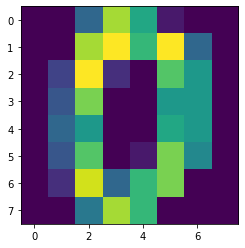

In [10]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5.** Apply singular value decomposition to the `digits.data` matrix.

In [11]:
U_digits, S_digits, VT_digits = svd(digits.data, full_matrices=False)

**6.** Visualize the data by projecting it onto such a plane that the coordinates of the points correspond to the first two new features. Don't forget to paint the dots corresponding to different numbers in different colors

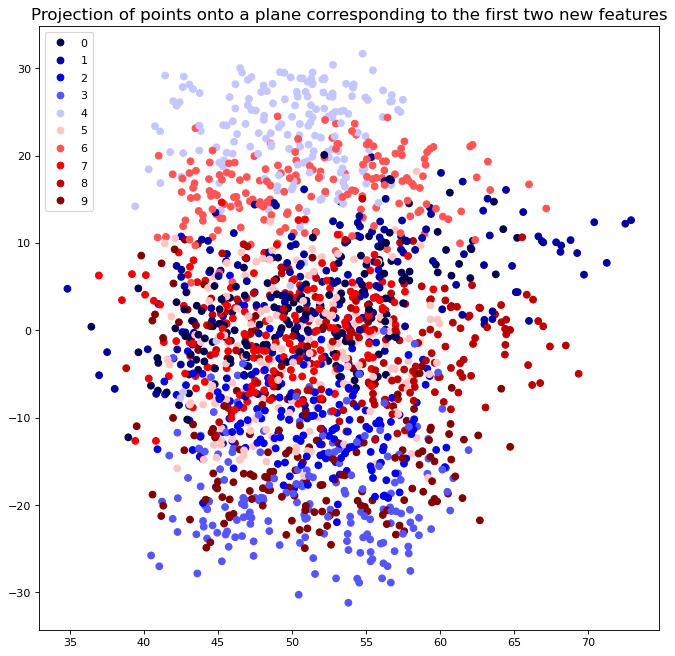

In [12]:
two_new_features = (digits.data @ VT_digits.T)[:,:2]
plt.figure(figsize = (10,10),dpi = 80)
plt.title('Projection of points onto a plane corresponding to the first two new features',fontsize = 15)
scatter = plt.scatter(two_new_features[:,0], two_new_features[:,1],c = digits.target, cmap = "seismic")
plt.legend(*scatter.legend_elements(num=10),
                    loc="upper left")

**7.** Now subtract its average value from each feature, make an SVD again and draw colored dots.

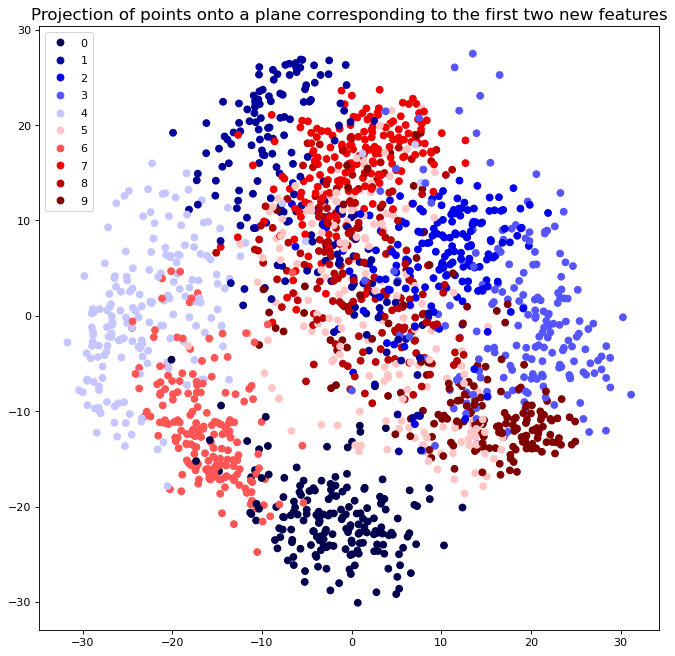

In [13]:
def minus_average (a):
    return a - np.average(a)

digits_minus_average = digits.data.copy()
digits_minus_average = np.apply_along_axis(minus_average,0,digits_minus_average)
U_digits_minus_average, S_digits_minus_average, VT_digits_minus_average = svd(digits_minus_average, full_matrices=False)

digits_minus_average_two_new_features = (digits_minus_average @ VT_digits_minus_average.T)[:,:2]
plt.figure(figsize = (10,10),dpi = 80)
plt.title('Projection of points onto a plane corresponding to the first two new features',fontsize = 15)
scatter = plt.scatter(digits_minus_average_two_new_features[:,0], digits_minus_average_two_new_features[:,1],c = digits.target, cmap = "seismic")
plt.legend(*scatter.legend_elements(num=10),
                    loc="upper left")

**8.** Compare the visualizations you performed in the previous two points. How does the latter differ favorably from the first?

In the first visualization, groups of different colors are strongly mixed, and in the second we can notice separate groups of the same color, that is, for each color we can determine the area in which most points of this color lie and such areas intersect much less often than in the first visualization, therefore, it is much easier to draw conclusions from the second visualization that what is this digit, at least in the area of the point corresponding to the first two new features, we are more likely to get the correct answer.

**9.** Compare the work of SVD with another dimensionality reduction method: [random Gaussian projections](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

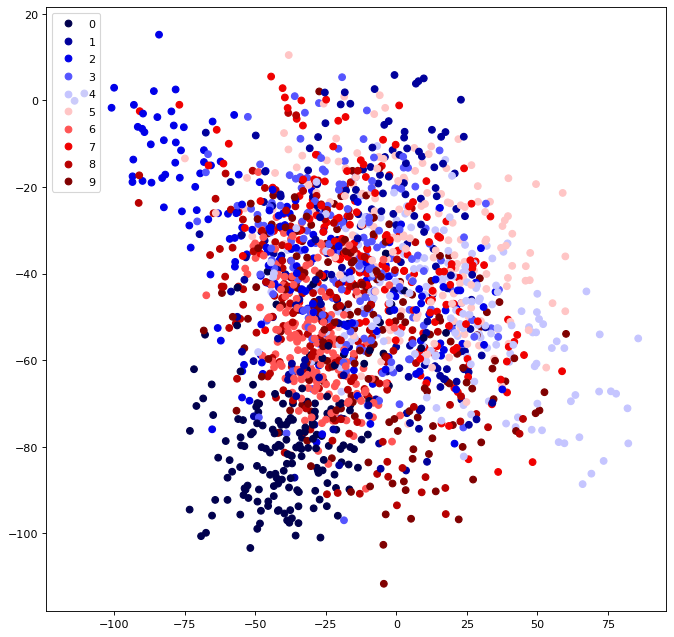

In [14]:
from sklearn.random_projection import GaussianRandomProjection
transformer = GaussianRandomProjection(2)
digits_rank_2_gauss = transformer.fit_transform(digits.data)
plt.figure(figsize = (10,10),dpi = 80)
scatter = plt.scatter(digits_rank_2_gauss[:,0], digits_rank_2_gauss[:,1],c = digits.target, cmap = "seismic")
plt.legend(*scatter.legend_elements(num=10),
                    loc="upper left")

### 3. When SVD fails

**What is the probability density**

If a random variable $X$ accepts only a finite (or countable) number of values $x_1,x_2,\ldots$, then to set it, it is enough to describe with what probability $X$ is equal to $x_i$: 

$$p_i = P(X = x_i)$$

so that $\sum_ip_i = 1$. If $X$ takes values on any segment or on the entire numeric line, then this will not work: in this case, the probability that $X$ is equal to some specific $x_0$ is usually zero. As a rule, the replacement of probabilities $p_i$ is the *distribution density function* $p(x)$. Its meaning is as follows:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(on the left side is the probability that the value of $X$ lies on the segment $[\alpha,\beta]$).

Thus, the function $p(x)$ really plays the role of "density": the higher the probability of getting into a segment of the same length, the greater the value of $p(x)$ on it.

**Normal distribution**

One of the most important examples of continuous distributions is the *normal distribution*. Its density has the form

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

It has two parameters:

- $a$ - *mathematical expectation* that has the meaning of an average value and for a normal distribution coincides with the center of symmetry of the distribution;
- $\sigma^2$ - *variance*: the smaller it is, the more the distribution is concentrated near its mathematical expectation

The normal distribution with parameters $a$ and $\sigma^2$ can be briefly denoted by $\mathcal{N}(a,\sigma^2)$.

In [15]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

c:\Users\MARIA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\MARIA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\MARIA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

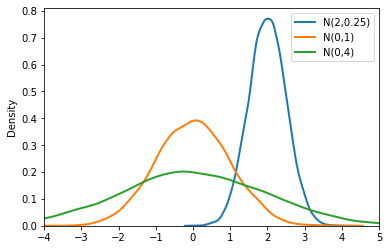

In [16]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Distribution density function in the multidimensional case**

If the values of the random variable $X$ are multidimensional vectors, the density function retains approximately the same meaning: if $\Omega\subseteq\mathbb{R}^n$, then

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Multidimensional normal distribution**

The multidimensional normal distribution is also determined by two parameters: *the vector of averages* $a$ and the positive definite *covariance matrix* $\Sigma$; it has a density of

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

where, recall, $x$ is a vector from $\mathbb{R}^n$. The components of the vector $a$ are the mathematical expectations of individual coordinates $X$, and on the diagonal of the matrix $\Sigma$ are their *variances* (real, without quotes). Outside the diagonal are the *covariances* of the $X$ component

**1.** By an (n-1)-dimensional ellipsoid we will understand a hypersurface in $\mathbb{R}^n$, such that in some rectangular cartesian coordinate system its equation takes the form $\sum_{i=1}^n\frac{x_i^2}{r_i^2}=1$. Prove that the surfaces of the level $p(x) = c$ are ellipsoids.

$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$

Let $\eta,\xi$ be two random variables defined on the same probability space. Then the covariance of the random variables $\eta$ and $\xi$ is:

$\mathrm{Cov}(\eta,\xi)=E\big((\eta-E\eta)\cdot(\xi-E\xi)\big)$.

We prove that covariance is a scalar product.

1. Linear for each argument.(We will prove by the first, by the second similarly) 

$\mathrm{Cov}(\alpha \eta _{1} + \beta \eta _{2},\xi)=E\big((\alpha \eta _{1} + \beta \eta _{2}-\alpha E\eta _{1} - \beta E\eta _{2})\cdot(\xi-E\xi)\big) $ =  $\alpha E\big((\eta_{1} -  E\eta_{1})\cdot (\xi - E\xi))\big) +\beta  E\big((\eta_{2} -  E\eta_{2})\cdot (\xi - E\xi))\big)$=$\alpha\mathrm{Cov} (\eta_{1},\xi) +\beta\mathrm{Cov} (\eta_{2},\xi) $

2. Symmetry 
$\mathrm{Cov} (\eta,\xi) = E\big((\eta-E\eta)\cdot(\xi-E\xi)\big) = E\big((\xi-E\xi)\cdot(\eta-E\eta)\big) = \mathrm{Cov} (\xi,\eta)$

3. Positive definite
$\mathrm{Cov} (\eta,\eta) = D(\eta) = E(\eta - E\eta)^{2} \geqslant 0$ and equality 0 is achieved when $\eta = E\eta$, that is, when $\eta$ is a constant

Thus, we proved that covariance is a scalar product.

Then the covariance matrix is a matrix of symmetric bilinear form (there is a bijection with quadratic forms) . We know that using the method of reducing the quadratic form to the main axes, it is possible to find an orthogonal basis replacement matrix in which the matrix will have a diagonal form, and there will be strictly positive numbers on the diagonal, since this is a positive definite form, and therefore, according to the Sylvester criterion, each angular minor of such a matrix is strictly greater than 0. Accordingly, $\Sigma^{-1}$ in the new basis will have the diagonal form : diag (${\frac{1}{\mu_{1} ^{2}},\frac{1}{\mu_{2} ^{2}},\frac{1}{\mu_{3} ^{2}}....}$ )
After changing the basis, we got a rectangular cartesian coordinate system in which p(x) takes the following form:
$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$ = $\frac1{(2\pi)^{n/2} \cdot | \mu_{1} \cdot \mu_{2} \cdot ..... \cdot \mu_{n}|}e^{-\frac12 ((x_{1} - a_{1})^{2} \frac{1}{\mu_{1}^{2}} + (x_{2} - a_{2})^{2} \frac{1}{\mu_{2}^{2}}  +...... + (x_{n} - a_{n})^{2} \frac{1}{\mu_{n}^{2}})}$ = $\frac1{(2\pi)^{n/2} \cdot | \mu_{1} \cdot \mu_{2} \cdot ..... \cdot \mu_{n}|}e^{-\frac12 (x_{1} - a_{1})^{2} \frac{1}{\mu_{1}^{2}}} \cdot e^{-\frac12 (x_{2} - a_{2})^{2} \frac{1}{\mu_{2}^{2}}} \cdot ..... \cdot e^{-\frac12 (x_{n} - a_{n})^{2} \frac{1}{\mu_{n}^{2}}} $ = $\frac{1}{\sqrt{2\pi\mu_{1}^{2}}}e^{-\frac{(x_{1} - a_{1})^{2}}{2\mu_{1}^{2}}} \cdot  \frac{1}{\sqrt{2\pi\mu_{2}^{2}}}e^{-\frac{(x_{2} - a_{2})^{2}}{2\mu_{2}^{2}}} \cdot ........ \cdot \frac{1}{\sqrt{2\pi\mu_{n}^{2}}}e^{-\frac{(x_{n} - a_{n})^{2}}{2\mu_{n}^{2}}}$ 

We know that in the covariance matrix on the diagonal there are variances of individual X coordinates (a multidimensional random variable whose distribution density we want to calculatе), and we also know that the components of vector a are the expectation of individual X coordinates 
Thus, we see that the density function of a multidimensional normal distribution can be represented as a product of one-dimensional normal planes (where the random variable is the coordinate of a multidimensional random variable X). 

Our equation looks like this:

p(x) = $\frac1{(2\pi)^{n/2} \cdot |\mu_{1} \cdot \mu_{2} \cdot ..... \cdot \mu_{n}|}e^{-\frac12 ((x_{1} - a_{1})^{2} \frac{1}{\mu_{1}^{2}} + (x_{2} - a_{2})^{2} \frac{1}{\mu_{2}^{2}}  +...... + (x_{n} - a_{n})^{2} \frac{1}{\mu_{n}^{2}})}$ = c

In the chosen basis, we can consider the variance and vector a as a constant, hence such an equation is equivalent to an equation of the form (where p = $c \cdot (2\pi) ^{\frac{n}{2}} \cdot |\mu_{1}\cdot \mu_{2} \cdot ......\cdot\mu_{n}|$> 0, we assume that $c\neq 0$ , since otherwise there are no solutions to such an equation (degenerate cases.) 

$-\frac12 ((x_{1} - a_{1})^{2} \frac{1}{\mu_{1}^{2}} + (x_{2} - a_{2})^{2} \frac{1}{\mu_{2}^{2}}  +...... + (x_{n} - a_{n})^{2} \frac{1}{\mu_{n}^{2}})$ = ln(p)
$((x_{1} - a_{1})^{2} \frac{1}{\mu_{1}^{2}} + (x_{2} - a_{2})^{2} \frac{1}{\mu_{2}^{2}}  +...... + (x_{n} - a_{n})^{2} \frac{1}{\mu_{n}^{2}})$ = ln($\frac{1}{p^{2}}$)

We assume that $ln(1/p_{2}) $ > 0, since if this value is less than 0, then there are no solutions in principle, and if it is equal to 0, then the solution is one point (degenerate cases). Let's choose a new сartesian coordinate system that will differ from the previous one by shifting the origin point, that is, coordinates in the new athenian coordinate system $(x_{1}', ..... x_{n}')$ = $(x_{1},......, x_{n})$ - $(a_{1},....., a_{n})$
Then our equation in the new cartesian system looks like this:
$x_{1}'^{2} \frac{1}{\mu_{1}^{2}} + x_{2}'^{2} \frac{1}{\mu_{2}^{2}}  +...... + x_{n}'^{2} \frac{1}{\mu_{n}^{2}}$ = ln($\frac{1}{p^{2}}$)

$\frac{x_{1}'^{2}}{\mu_{1}^{2} ln(\frac{1}{p^{2}})} + \frac{x_{2}'^{2}}{\mu_{2}^{2} ln(\frac{1}{p^{2}})}   +...... + \frac{x_{n}'^{2}}{\mu_{n}^{2} ln(\frac{1}{p^{2}})} $ = 1

Then we get an equation of the form :
$\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$ 
It turns out that the surfaces of the level p(x) = c are ellipsoids. That was what needed to be proved.

We will generate many points from a two-dimensional normal distribution with a vector of averages $(-1,3)$ and a covariance matrix

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

and we will draw approximate lines of the level of the density function.

c:\Users\MARIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

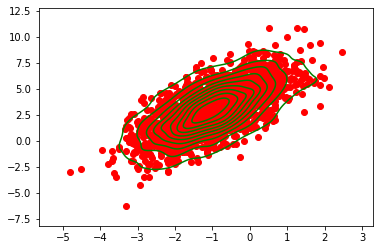

In [17]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s[:,0],s[:,1], shade=False, color='g')

As you can see, the level lines are very similar to ellipses (they only remind them, because we still have a finite number of points).

**3.** Generate a sample of 1000 points $x_1,\ldots,x_{1000}$ from a normal distribution with a vector of averages $a = (0,0)$ and a covariance matrix

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

c:\Users\MARIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

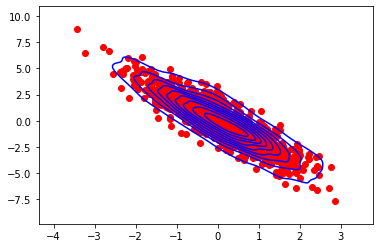

In [18]:
N = 1000
s = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s[:,0],s[:,1], shade=False, color='b')

**4.** Do an SVD decomposition of $X = U\Sigma V^T$. Draw all the points $x_i$ and the directions of the new features on the plane. Make sure that the directions of the new features roughly coincide with the directions of the semi-axes of the ellipse formed by the points.

[[ 0.3749326  -0.92705207]
 [-0.92705207 -0.3749326 ]]


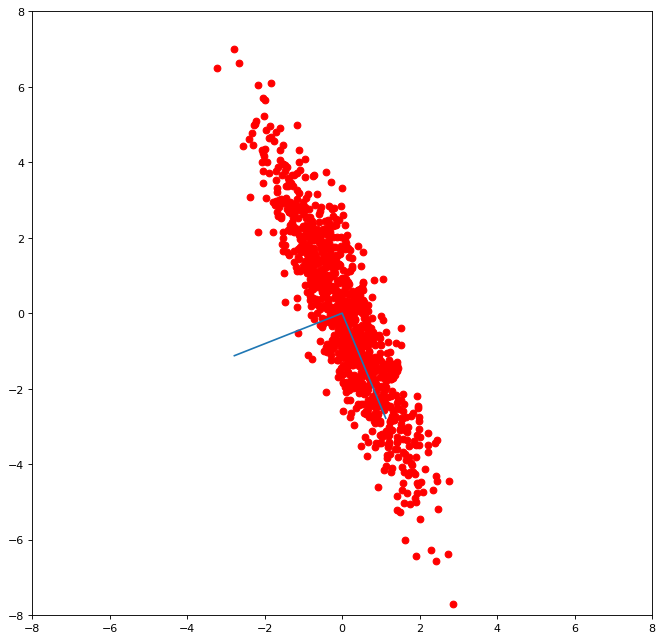

In [19]:
s_u, s_sigma, s_vt = svd(s, full_matrices=False)
print(s_vt)
plt.figure(figsize = (10,10),dpi = 80)
plt.axis([-8,8,-8,8])
plt.scatter((s)[:,0], (s)[:,1], color='red')
origin = np.array([[0, 0],[0, 0]])
plt.plot([s_vt[0][0]*3,0,s_vt[1][0]*3],[s_vt[0][1]*3,0,s_vt[1][1]*3])


**5.** Bring the covariance matrix to the main axes and make sure that the directions of these axes also roughly coincide with the observed directions of the semi-axes of the ellipsoid.

$\Sigma = \begin{pmatrix}
  1 &  -2\\
  -2 & 5
\end{pmatrix}$

Consider this matrix as a matrix of a linear operator. Let's find its eigenvalues. The eigenvalues are the roots of the characteristic polynomial.

$det\begin{pmatrix}
  1 - t &  -2\\
  -2 & 5 -t
\end{pmatrix} = (t-1)(t-5) + 4 = t^2 - 6t + 1 = 0 $
Roots : $\frac{6+\sqrt{32}}{2} = 3+2\sqrt{2}$ and $\frac{6-\sqrt{32}}{2} = 3-2\sqrt{2}$

Let's find the coordinates of the bases of the proper subspaces, for this we find the fundamental system of solutions of the homogeneous system of linear equations : $(\Sigma - tE) x = 0$, where t is the eigenvalue.

1) Find the fundamental system of solutions at t = $3+2\sqrt{2}$. To do this, we give the matrix $(\Sigma - (3+2\sqrt{2})E)$ to an improved step view
$\begin{pmatrix}
  -2-2\sqrt2 &  -2\\
  -2 & 2-2\sqrt2
\end{pmatrix}$ $\rightarrow$ $\begin{pmatrix}
  -2\sqrt2 &  -4+2\sqrt2\\
  2\sqrt2 & 4-2\sqrt2
\end{pmatrix}$ $\rightarrow$ $\begin{pmatrix}
  1 &  \sqrt{2} - 1\\
  0 & 0
\end{pmatrix}$
fundamental system of solutions : $\begin{pmatrix}
  1 - \sqrt2\\
  1
\end{pmatrix}$, then the coordinates of the orthonormal basis of this proper subspace = $\begin{pmatrix}
  (\sqrt2-1) \cdot \frac{1}{\sqrt{1 + (1-\sqrt2)^{2}}}\\
  -1 \cdot \frac{1}{\sqrt{1 + (1-\sqrt2)^{2}}} 
\end{pmatrix}$ $\approx$ $\begin{pmatrix}
  0.38\\
  -0.92
\end{pmatrix}$

2) Find the fundamental system of solutions at t =$3-2\sqrt{2}$. To do this, we give the matrix $(\Sigma - (3-2\sqrt{2})E)$ to an improved step view
$\begin{pmatrix}
  -2+2\sqrt2 &  -2\\
  -2 & 2+2\sqrt2
\end{pmatrix}$ $\rightarrow$ $\begin{pmatrix}
  2\sqrt2 &  -4 - 2\sqrt2\\
  -2\sqrt2 & 4 + 2\sqrt2
\end{pmatrix}$ $\rightarrow$ $\begin{pmatrix}
  1 &  -\sqrt2 - 1\\
  0 & 0
\end{pmatrix}$
Fundamental system of solutions : $\begin{pmatrix}
  1 + \sqrt2\\
  1
\end{pmatrix}$, then the coordinates of the orthonormal basis of this proper subspace = $\begin{pmatrix}
  (1+\sqrt2)\cdot \frac{1}{\sqrt{1 + (1+\sqrt{2}})^{2}}\\
  1 \cdot \frac{1}{\sqrt{1 + (1+\sqrt{2}})^{2}}
\end{pmatrix}$ $\approx$ $\begin{pmatrix}
  0.92\\
  0.38
\end{pmatrix}$

Basis replacement matrix :
C = $\begin{pmatrix}
  (\sqrt2-1) \cdot \frac{1}{\sqrt{1 + (1-\sqrt2)^{2}}}  &  (1+\sqrt2)\cdot \frac{1}{\sqrt{1 + (1+\sqrt{2}})^{2}}\\
 -1 \cdot \frac{1}{\sqrt{1 + (1-\sqrt2)^{2}}} &  1 \cdot \frac{1}{\sqrt{1 + (1+\sqrt{2}})^{2}}
\end{pmatrix} $ is orthogonal since $C^{T}C = E$
Thus, the matrix in the new basis = $C^{-1}\Sigma C$ = $C^{T}\Sigma C$ = $\begin{pmatrix}
  3+2\sqrt2 &  0\\
  0 & 3-2\sqrt2
\end{pmatrix}$
And as we can see (comparing with the coordinates of the direction vector of the new features from the previous task), the directions of these axes are indeed almost identical to the observed directions of the semi-axes of the ellipsoid

As you can see, SVD does its job well when the data is distributed normally, and in other cases it may not give such informative (or even not adequate) results at all.

**6.** Generate a two-dimensional sample consisting of two long and narrow non-intersecting ellipses located side by side with centers at points $(-1.0)$ and $(1.0)$ and with parallel directions of the semi-axes.

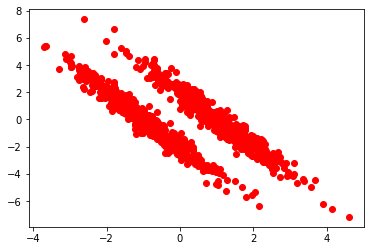

In [20]:
N = 500
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[1,-2],[-2,4.25]]), size=N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[1,-2],[-2,4.25]]), size=N)
s = np.concatenate((s1,s2),axis = 0)
plt.scatter(s[:,0], s[:,1], color='red')

**7.** Make an SVD and draw the directions of the new signs.

[[ 0.51609005 -0.85653433]
 [-0.85653433 -0.51609005]]


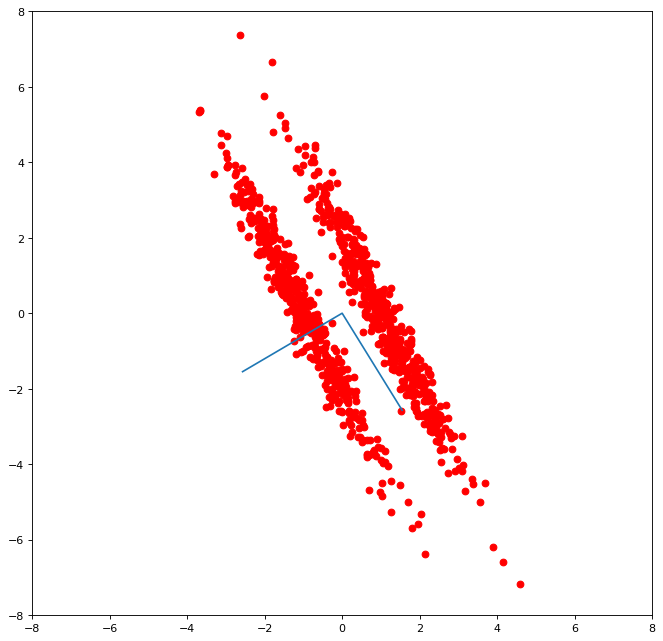

In [21]:
s_u, s_sigma, s_vt = svd(s, full_matrices=False)
print(s_vt)
plt.figure(figsize = (10,10),dpi = 80)
plt.axis([-8,8,-8,8])
plt.scatter((s)[:,0], (s)[:,1], color='red')
origin = np.array([[-1, 0],[-1, 0]])
plt.plot([s_vt[0][0]*3,0,s_vt[1][0]*3],[s_vt[0][1]*3,0,s_vt[1][1]*3])

**9.** Generate a sample of 1000 points $x_1,\ldots,x_{1000}$ from a normal distribution with a vector of averages $a =(1,1)$ and a covariance matrix

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

c:\Users\MARIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

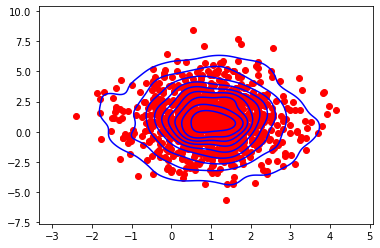

In [22]:
N = 1000
s = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s[:,0],s[:,1], shade=False, color='b')

**11.** Make an SVD decomposition of $X = U\Sigma V^T$. Draw all the points $x_i$ on the plane and the directions of the new features.

[[ 0.26176559  0.96513148]
 [ 0.96513148 -0.26176559]]


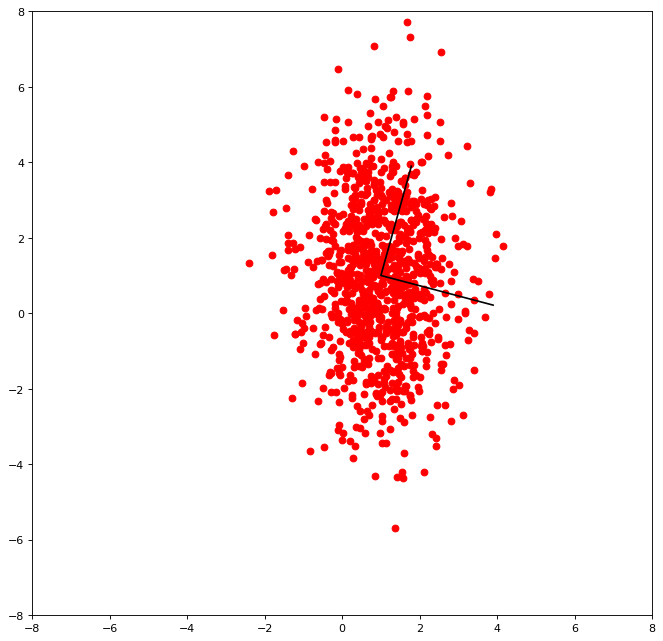

In [23]:
s_u, s_sigma, s_vt = svd(s, full_matrices=False)
print(s_vt)
plt.figure(figsize = (10,10),dpi = 80)
plt.axis([-8,8,-8,8])
plt.scatter((s)[:,0], (s)[:,1], color='red')
origin = np.array([[-1, 0],[-1, 0]])
plt.plot([1+s_vt[0][0]*3,1,1+ s_vt[1][0]*3],[1+ s_vt[0][1]*3,1,1+ s_vt[1][1]*3],color = 'black')